In [1]:
X = 1:1:10
Y = [rand() for x in X]

function lagrangeInterpolation(X, Y)
    interpolation = 
    function(x)
        y=0.0
        for k in 1:1:length(X)
            t = 1.0
            for j in 1:1:length(X)
                if j != k
                    t = t*((x-X[j])/(X[k]-X[j]))
                end
            end
            y += t*Y[k]
        end
        y
    end
    return interpolation
end

lagrangeInterpolation (generic function with 1 method)

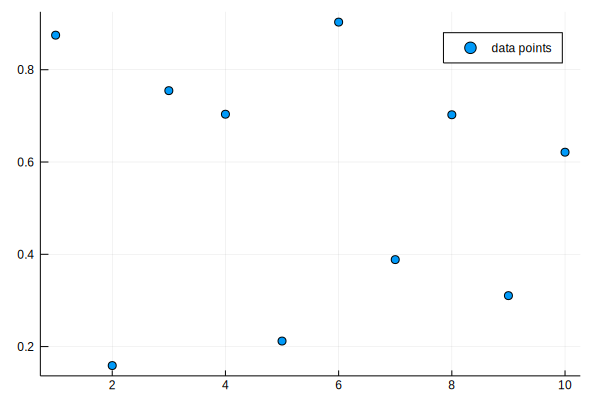

In [2]:
using Plots
scatter(X,Y, label="data points")

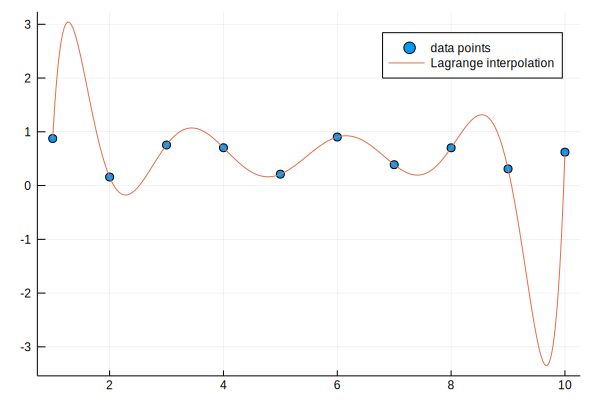

In [3]:
# gęste punkty do rysowania wykresów funkcji interpolujacych
Xs = 1:0.01:10
fit1 = lagrangeInterpolation(X,Y)
Ys1 = [fit1(x) for x in Xs]
plot!(Xs,Ys1, label="Lagrange interpolation")

In [4]:
function newtonInterpolation(X,Y)
    P = Function[]
    push!(P,(l -> Y[1]))
    #println(P[1](1))
    for k in 2:1:(length(X))
        Ck = Y[k] - P[k-1](X[k])
        for i in 1:1:(k-1)
            Ck = Ck/(X[k]-X[i])
        end
        pk = function(x)
            r = Ck
            for i in 1:1:(k-1)
                r = r*(x-X[i])
            end
            return r 
        end
        fun = function(a) pk(a) + P[k-1](a) end
        push!(P,fun)
    end
    return P[length(X)]
end

newtonInterpolation (generic function with 1 method)

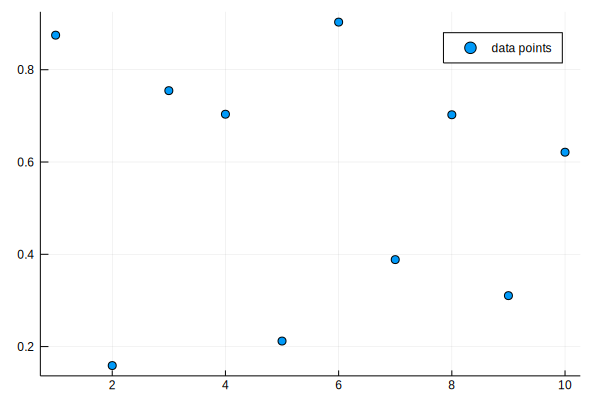

In [5]:
scatter(X,Y, label="data points")

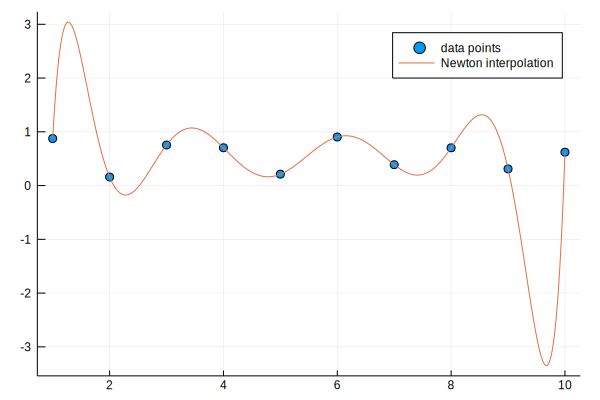

In [6]:
fit2 = newtonInterpolation(X,Y)
Ys2 = [fit2(x) for x in Xs]
scatter(X,Y, label="data points")
plot!(Xs,Ys2, label="Newton interpolation")


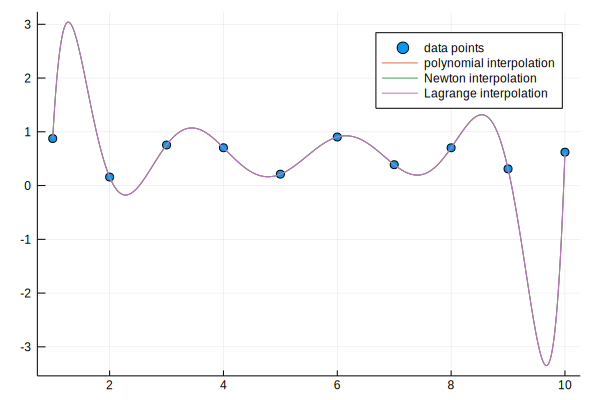

In [7]:
# interpolacja wielomianowa w pakiecie Polynomials
using Polynomials
fit3 = polyfit(X,Y)
Y3 = [fit3(x) for x in Xs]
scatter(X,Y, label="data points")
plot!(Xs,Y3, label="polynomial interpolation")
plot!(Xs,Ys2, label="Newton interpolation")
plot!(Xs,Ys1, label="Lagrange interpolation")



In [8]:
using DataFrames
using Statistics
times = DataFrame(size=[],Newton=[],Lagrange=[],Polymnomials=[])
mn = 1000000
for size in 1:4:100
    for attempt in 1:1:10
        xTest = 1:1:size
        yTest = [rand() for x in xTest]
        push!(times,[(size),mn*@elapsed(newtonInterpolation(xTest,yTest)),mn*@elapsed(lagrangeInterpolation(xTest,yTest)), mn*@elapsed(polyfit(xTest,yTest))])
    end
end
times

,size,Newton,Lagrange,Polymnomials
,Any,Any,Any,Any
1,1.0,7.277,3.922,1.60554e6
2,1.0,4.007,2.572,6.634
3,1.0,1.091,0.543,1.841
4,1.0,0.748,0.509,1.421
5,1.0,0.664,0.384,1.341
6,1.0,0.599,0.37,1.613
7,1.0,0.832,0.401,1.5
8,1.0,0.52,0.45,1.476
9,1.0,0.624,0.335,1.605


In [9]:
LagrangeMean = by(times,:size,df->mean(df[:Lagrange]))
LagrangeSD = by(times,:size,df->std(df[:Lagrange]))
Lagrange = DataFrame(Size = unique(times[:size]), Mean = LagrangeMean[2], STD = LagrangeSD[2])

,Size,Mean,STD
,Any,Float64,Float64
1,1.0,0.9869,1.2346
2,5.0,0.8283,0.990144
3,9.0,0.5951,0.100489
4,13.0,0.9312,0.516002
5,17.0,0.4955,0.404526
6,21.0,0.9061,0.532575
7,25.0,1.7961,0.544513
8,29.0,1.0264,0.535762
9,33.0,1.4762,0.552659


In [10]:
NewtonMean = by(times,:size,df->mean(df[:Newton]))
NewtonSD = by(times,:size,df->std(df[:Newton]))
Newton = DataFrame(Size = unique(times[:size]), Mean = NewtonMean[2], STD = NewtonSD[2])

,Size,Mean,STD
,Any,Float64,Float64
1,1.0,1.7042,2.2194
2,5.0,15.2652,9.06806
3,9.0,33.3241,8.30238
4,13.0,86.2986,30.0892
5,17.0,162.569,107.062
6,21.0,408.344,149.836
7,25.0,764.356,87.612
8,29.0,868.426,281.405
9,33.0,1374.83,288.943


In [11]:
PolymnomialsMean = by(times,:size,df->mean(df[:Polymnomials]))
PolymnomialsSD = by(times,:size,df->std(df[:Polymnomials]))
Polymnomials = DataFrame(Size = unique(times[:size]), Mean = PolymnomialsMean[2], STD = PolymnomialsSD[2])

,Size,Mean,STD
,Any,Float64,Float64
1,1.0,1.60556e5,5.07717e5
2,5.0,1681.39,5303.34
3,9.0,5.6809,1.22204
4,13.0,9.1796,3.96542
5,17.0,8.8614,4.77983
6,21.0,34.3023,21.0041
7,25.0,126.749,231.972
8,29.0,33.4963,10.858
9,33.0,177.947,426.684


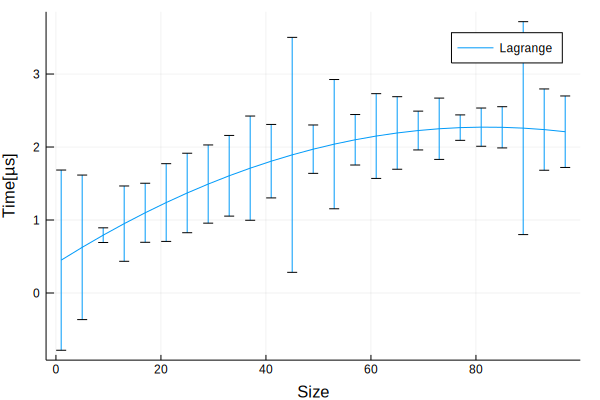

In [12]:
polyFit1 = polyfit(Lagrange[:Size],Lagrange[:Mean],2)
plot(Lagrange[:Size],polyval(polyFit1,Lagrange[:Size]),label = "Lagrange",xlabel="Size", ylabel="Time[µs]",yerror=Lagrange[:STD])

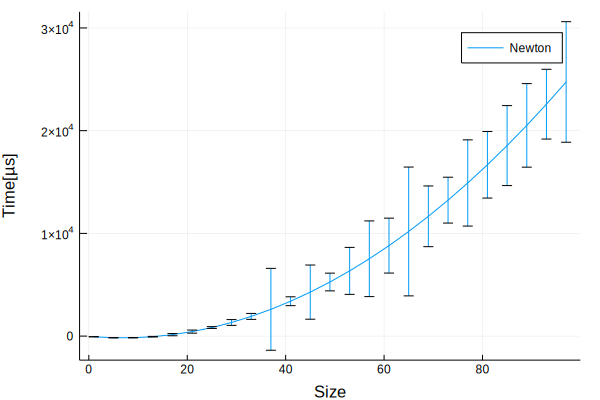

In [13]:
polyFit2 = polyfit(Newton[:Size],Newton[:Mean],2)
plot(Newton[:Size],polyval(polyFit2,Newton[:Size]),label = "Newton",xlabel="Size", ylabel="Time[µs]",yerror=Newton[:STD])

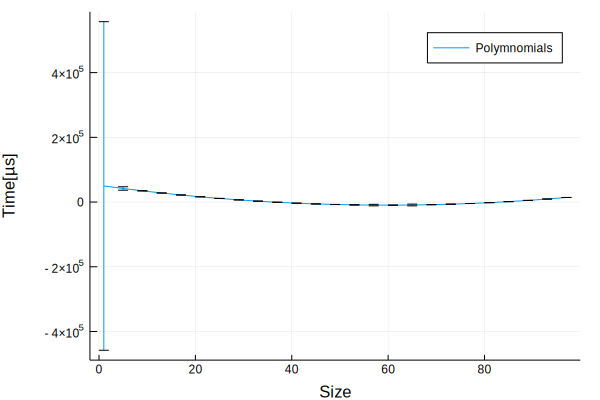

In [14]:
polyFit3 = polyfit(Polymnomials[:Size],Polymnomials[:Mean],2)
plot(Polymnomials[:Size],polyval(polyFit3,Polymnomials[:Size]),label = "Polymnomials",xlabel="Size", ylabel="Time[µs]",yerror=Polymnomials[:STD])

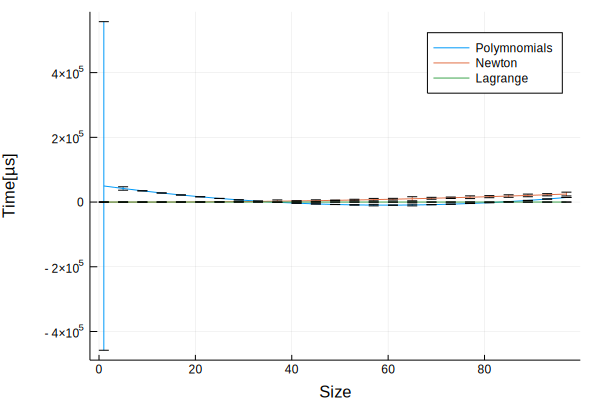

In [15]:
plot(Polymnomials[:Size],polyval(polyFit3,Polymnomials[:Size]),label = "Polymnomials",xlabel="Size", ylabel="Time[µs]",yerror=Polymnomials[:STD])
plot!(Newton[:Size],polyval(polyFit2,Newton[:Size]),label = "Newton",xlabel="Size", ylabel="Time[µs]",yerror=Newton[:STD])
plot!(Lagrange[:Size],polyval(polyFit1,Lagrange[:Size]),label = "Lagrange",xlabel="Size", ylabel="Time[µs]",yerror=Lagrange[:STD])

┌ Info: Recompiling stale cache file /Users/kuba/.julia/compiled/v1.0/Interpolations/VpKVx.ji for Interpolations [a98d9a8b-a2ab-59e6-89dd-64a1c18fca59]
└ @ Base loading.jl:1187


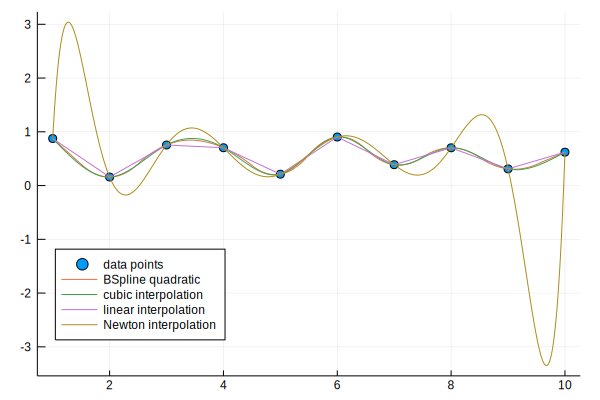

In [16]:
using Interpolations
interp_cubic = CubicSplineInterpolation(X, Y)
interp_linear = LinearInterpolation(X, Y)
itp_quadratic = interpolate(Y, BSpline(Quadratic(Line(OnCell()))))
interp_newton = newtonInterpolation(X,Y)
YN = [interp_newton(x) for x in Xs]
YQ = [itp_quadratic(x) for x in Xs]
YL = [interp_linear(x) for x in Xs]
YC = [interp_cubic(x) for x in Xs]
scatter(X, Y, label ="data points", legend=:bottomleft)
plot!(Xs, YQ, label ="BSpline quadratic")
plot!(Xs, YC, label = "cubic interpolation")
plot!(Xs, YL, label = "linear interpolation")
plot!(Xs, YN, label = "Newton interpolation")


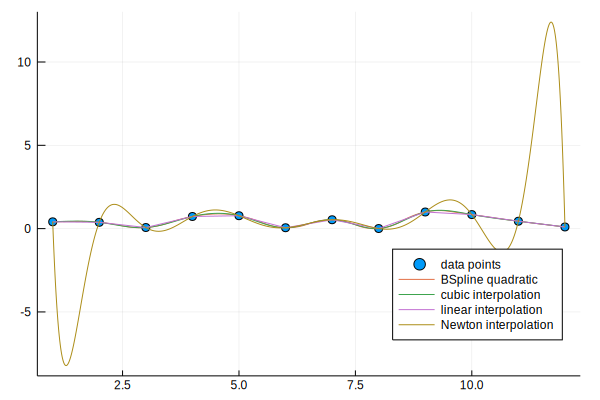

In [17]:
X1 = 1:1:12
Xs1 = 1:0.01:12
Y1 = [rand() for x in X1]
using Interpolations
interp_cubic = CubicSplineInterpolation(X1, Y1)
interp_linear = LinearInterpolation(X1, Y1)
itp_quadratic = interpolate(Y1, BSpline(Quadratic(Line(OnCell()))))
interp_newton = newtonInterpolation(X1,Y1)
YN = [interp_newton(x) for x in Xs1]
YQ = [itp_quadratic(x) for x in Xs1]
YL = [interp_linear(x) for x in Xs1]
YC = [interp_cubic(x) for x in Xs1]
scatter(X1, Y1, label ="data points", legend=:bottomright)
plot!(Xs1, YQ, label ="BSpline quadratic")
plot!(Xs1, YC, label = "cubic interpolation")
plot!(Xs1, YL, label = "linear interpolation")
plot!(Xs1, YN, label = "Newton interpolation")